In [1]:
from tqdm.auto import tqdm
from policy_runner import define_actions, define_policies, run_policies
import matplotlib.pyplot as plt
import numpy as np

In [2]:
actions = define_actions(10)

for action in actions:
    print(f"Action {action.name}: average reward = {action.average_reward}")

Action 1: average reward = -0.7717604133450066
Action 2: average reward = 1.5027435244221488
Action 3: average reward = -1.3756003811999782
Action 4: average reward = 0.423536440338929
Action 5: average reward = 0.3784510745788377
Action 6: average reward = -1.4298823341449867
Action 7: average reward = -0.49201479773268647
Action 8: average reward = -0.8677023809527439
Action 9: average reward = -1.5796115065482603
Action 10: average reward = -0.12184649422568776


In [3]:
policies = define_policies(actions)
run_policies(policies, 10)

{'greedy r$_0$=0': array([ 1.00366092, -0.18924526,  0.98080027, -0.83701152,  0.21152558,
         1.35308032,  0.66079926,  1.28488214,  0.97559949, -0.02083215]),
 'greedy r$_0$=5': array([-0.83424998,  2.22785018, -0.9942078 , -0.72881375, -0.55860403,
        -1.49427088, -1.69033275, -0.0586249 , -3.22407446, -0.44962721]),
 'epsilon-greedy $\\epsilon$=0.1': array([-0.89772508, -1.51769792, -2.18165536, -0.35310534,  2.02324308,
         0.82538631,  1.85642781,  1.87817494, -1.46956015,  0.18959464]),
 'epsilon-greedy $\\epsilon$=0.01': array([-2.10808102, -1.25382227,  0.46648555,  0.94515376,  0.79676803,
        -0.42883967,  0.9036147 ,  0.81639455,  1.64873731, -0.27494644]),
 'UCB c=2': array([ 1.31184097,  0.87875753, -4.28907633,  1.13868128,  0.29687139,
        -1.39180784, -1.82891854,  0.34893657,  0.42275626, -0.03305724])}

In [4]:
def average_runs(prev, new, idx):
    if prev is None:
        return new

    assert set(prev.keys()) == set(new.keys())
    for name, old_res in prev.items():
        prev[name] = old_res + (new[name] - old_res) / idx

    return prev


In [5]:
POLICY_RUN_STEPS = 1000
REPEAT = 2000

combined_results = None

for i in tqdm(range(REPEAT), desc="Evaluation iteration"):
    actions = define_actions(10)
    policies = define_policies(actions)
    new_results = run_policies(policies, POLICY_RUN_STEPS)
    combined_results = average_runs(combined_results, new_results, i)


Evaluation iteration:   0%|          | 0/2000 [00:00<?, ?it/s]

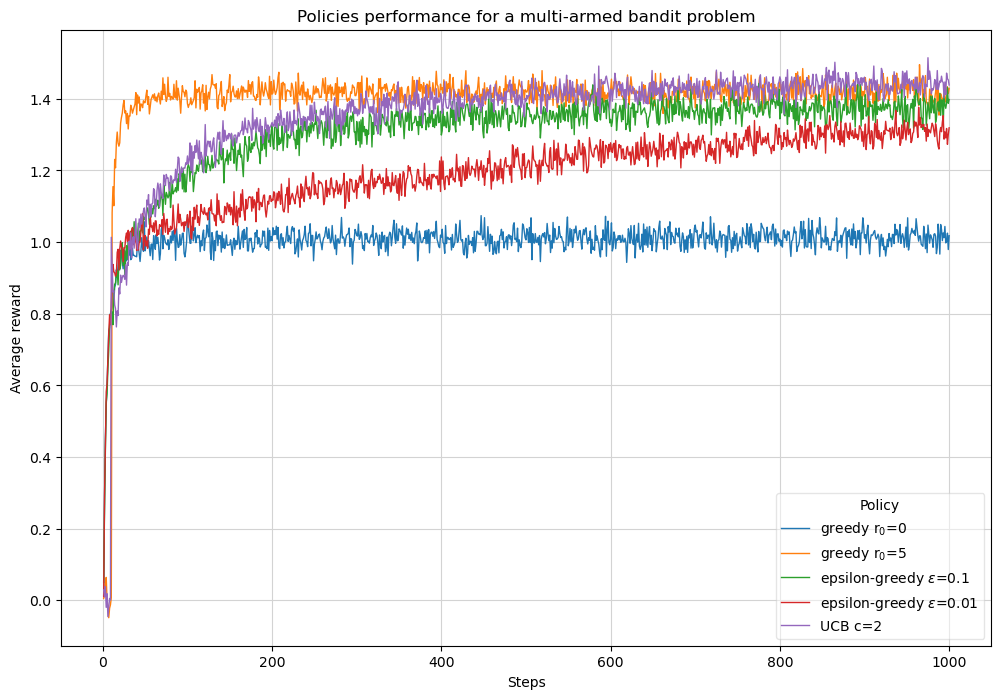

In [9]:
def plot_results(results):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid(color='lightgrey')
    x = np.arange(len(next(iter(results.values())))) + 1
    for policy_name, policy_result in results.items():
        ax.plot(x, policy_result, label=policy_name, lw=1)
    ax.legend(title="Policy", fancybox=True, framealpha=0.5)
    ax.set_ylabel("Average reward")
    ax.set_xlabel("Steps")
    _ = ax.set_title("Policies performance for a multi-armed bandit problem")

plot_results(combined_results)

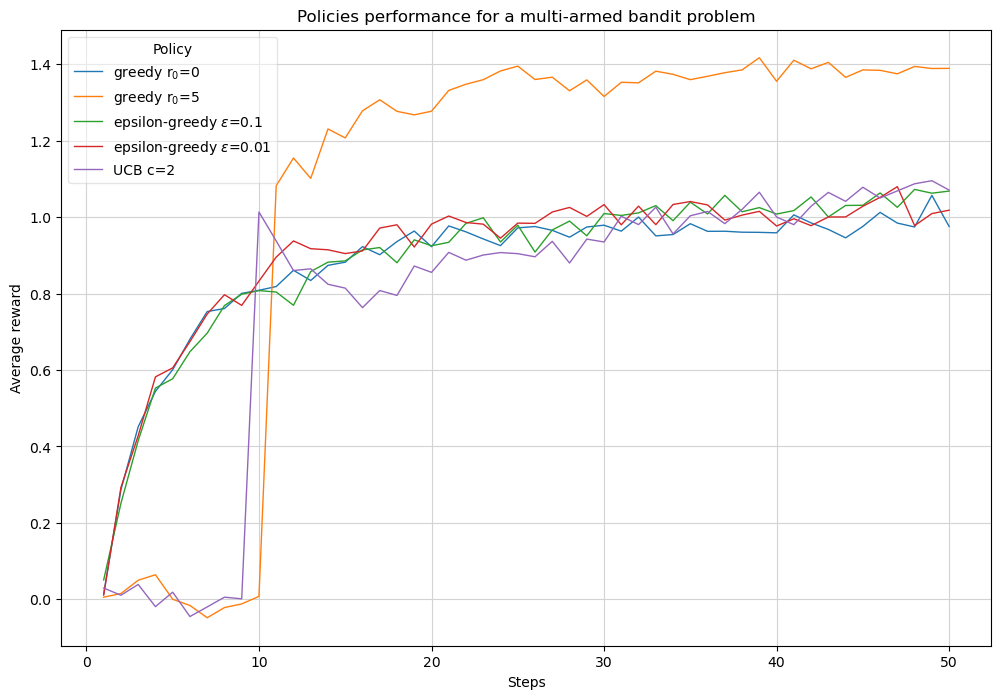

In [13]:
results_trimmed = {key: value[:50] for key, value in combined_results.items()}
plot_results(results_trimmed)